# Grid Search

In [1]:
from sklearn import model_selection, linear_model, datasets, metrics

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X, y = datasets.load_iris(return_X_y = True)

train_data, test_data, train_label, test_label = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
len(train_data), len(test_data)

(105, 45)

In [4]:
classifier = linear_model.SGDClassifier(random_state=0, tol=1e-3) #модель

In [5]:
parameters_grid = {
    'loss' : ['hinge', 'log', 'squared_hinge', 'squared_loss'],
    'penalty' : ['l1', 'l2'],
    'alpha' : np.linspace(0.0001, 0.001, num = 5),
}

In [6]:
cv = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [7]:
grid_search = model_selection.GridSearchCV(classifier, parameters_grid, scoring='accuracy', cv=cv)

In [8]:
%%time
grid_search.fit(train_data, train_label)

Wall time: 5.86 s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
             estimator=SGDClassifier(random_state=0),
             param_grid={'alpha': array([0.0001  , 0.000325, 0.00055 , 0.000775, 0.001   ]),
                         'loss': ['hinge', 'log', 'squared_hinge',
                                  'squared_loss'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [9]:
print(grid_search.best_estimator_)

SGDClassifier(alpha=0.0007750000000000001, loss='squared_hinge', penalty='l1',
              random_state=0)


In [10]:
# grid_search.cv_results_

## RandomizedSearch

In [11]:
randomized_gridcv = model_selection.RandomizedSearchCV(classifier, parameters_grid, scoring='accuracy', random_state=0, 
                                                    cv=cv, n_iter=20)

In [12]:
randomized_gridcv.get_params()

{'cv': StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
             train_size=None),
 'error_score': nan,
 'estimator__alpha': 0.0001,
 'estimator__average': False,
 'estimator__class_weight': None,
 'estimator__early_stopping': False,
 'estimator__epsilon': 0.1,
 'estimator__eta0': 0.0,
 'estimator__fit_intercept': True,
 'estimator__l1_ratio': 0.15,
 'estimator__learning_rate': 'optimal',
 'estimator__loss': 'hinge',
 'estimator__max_iter': 1000,
 'estimator__n_iter_no_change': 5,
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__power_t': 0.5,
 'estimator__random_state': 0,
 'estimator__shuffle': True,
 'estimator__tol': 0.001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': SGDClassifier(random_state=0),
 'iid': 'deprecated',
 'n_iter': 20,
 'n_jobs': None,
 'param_distributions': {'loss': ['hinge',
   'log',
   'squared_hinge',
   'squared_loss'],
  'penalty': ['l1', 'l2'],
  '

In [13]:
%%time
randomized_gridcv.fit(train_data, train_label)

Wall time: 3.19 s


RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
                   estimator=SGDClassifier(random_state=0), n_iter=20,
                   param_distributions={'alpha': array([0.0001  , 0.000325, 0.00055 , 0.000775, 0.001   ]),
                                        'loss': ['hinge', 'log',
                                                 'squared_hinge',
                                                 'squared_loss'],
                                        'penalty': ['l1', 'l2']},
                   random_state=0, scoring='accuracy')

In [14]:
randomized_gridcv.best_params_

{'penalty': 'l1', 'loss': 'squared_hinge', 'alpha': 0.0007750000000000001}

# Задача

In [15]:
df = pd.read_csv('bike_sharing_demand.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [16]:
df.shape

(10886, 12)

In [17]:
df.isna().values.any()

False

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [19]:
df.datetime = pd.to_datetime(df.datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [20]:
df['month'] = df.datetime.dt.month
df['hour'] = df.datetime.dt.hour
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,22


In [21]:
train_data = df.iloc[:-1000]
test_data = df.iloc[-1000:]

In [22]:
print(df.shape, train_data.shape, test_data.shape)

(10886, 14) (9886, 14) (1000, 14)


In [23]:
print(train_data.datetime.min(), train_data.datetime.max())
print(test_data.datetime.min(), test_data.datetime.max())

2011-01-01 00:00:00 2012-10-16 06:00:00
2012-10-16 07:00:00 2012-12-19 23:00:00


In [24]:
# обучение 

train_y = train_data['count']
train_X = train_data.drop(['count', 'datetime'], axis=1)

In [25]:
# тест
test_y = test_data['count']
test_X = test_data.drop(['count', 'datetime'], axis=1)

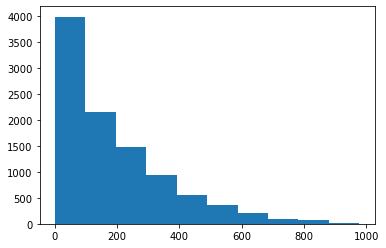

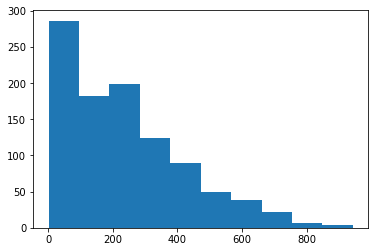

In [26]:
plt.hist(train_y)
plt.show()

plt.hist(test_y)
plt.show()

In [27]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'month', 'hour']

In [28]:
train_X = train_X[numeric_columns]
test_X = test_X[numeric_columns]

In [29]:
train_X.head()
test_X.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
9886,17.22,21.210,67,6.0032,20,505,10,7
9887,18.04,21.970,62,0.0000,35,800,10,8
9888,19.68,23.485,55,16.9979,32,323,10,9
9889,20.50,24.240,48,19.0012,65,157,10,10
9890,20.50,24.240,45,27.9993,56,172,10,11


# Модель

In [30]:
regressor = linear_model.SGDRegressor(random_state=42)
regressor.fit(train_X, train_y)
metrics.mean_absolute_error(test_y, regressor.predict(test_X))

2644928446076.348

In [31]:
regressor.predict(test_X)[:10]

array([-2.16451127e+12, -3.85206056e+12, -3.14592415e+12, -6.34513506e+12,
       -5.22619008e+12, -6.68771808e+12, -6.65271423e+12, -9.27988268e+12,
       -7.37861027e+12, -7.74859297e+12])

In [32]:
regressor.coef_

array([-2.04683713e+10, -2.94452290e+10,  1.21712123e+09,  2.53864876e+10,
       -9.80248283e+10, -1.12397793e+08,  4.57096103e+10,  1.36286987e+10])

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [35]:
regressor.fit(train_X_scaled, train_y)
metrics.mean_absolute_error(test_y, regressor.predict(test_X_scaled))
regressor.coef_.round(1)

array([ -0.3,   0.3,  -0. ,   0. ,  50.9, 148. ,   0. ,   0. ])

In [36]:
test_y.values[:5]

array([525, 835, 355, 222, 228], dtype=int64)

In [37]:
regressor.predict(test_X_scaled)[:5]

array([524.96844415, 834.92212901, 354.99958532, 222.02205871,
       228.03262424])

In [38]:
train_X = train_X.drop(['casual', 'registered'], axis=1)

In [39]:
test_X = test_X.drop(['casual', 'registered'], axis=1)

In [40]:
scaler.fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [41]:
regressor.fit(train_X_scaled, train_y)
metrics.mean_absolute_error(test_y, regressor.predict(test_X_scaled))

121.94849443629613

In [42]:
regressor.coef_.round(2)

array([ 29.68,  32.61, -45.27,   1.58,  13.03,  50.18])

# Создаем Pipeline

In [43]:
from sklearn.pipeline import Pipeline
from sklearn import pipeline
from sklearn import preprocessing

In [44]:
pipeline = Pipeline(steps=[('scaling', scaler), 
                          ('regression', regressor)])

In [45]:
pipeline.fit(train_X_scaled, train_y)
metrics.mean_absolute_error(test_y, pipeline.predict(test_X_scaled))

121.94849443629613

In [46]:
params_grid = {'regression__loss': ['huber', 'epsilon_insensitive', 'squared_loss'], 
              'regression__penalty': ['l1', 'l2'], 
              'regression__alpha': np.linspace(1e-4, 1e-1, 10), 
              'regression__max_iter': [100000]}

In [47]:
grid_cv = model_selection.GridSearchCV(pipeline, params_grid, scoring='neg_mean_absolute_error', cv=4)

In [48]:
%time
grid_cv.fit(train_X_scaled, train_y)

Wall time: 0 ns


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('regression',
                                        SGDRegressor(random_state=42))]),
             param_grid={'regression__alpha': array([0.0001, 0.0112, 0.0223, 0.0334, 0.0445, 0.0556, 0.0667, 0.0778,
       0.0889, 0.1   ]),
                         'regression__loss': ['huber', 'epsilon_insensitive',
                                              'squared_loss'],
                         'regression__max_iter': [100000],
                         'regression__penalty': ['l1', 'l2']},
             scoring='neg_mean_absolute_error')

In [49]:
grid_cv.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('regression',
                 SGDRegressor(alpha=0.0223, loss='epsilon_insensitive',
                              max_iter=100000, penalty='l1',
                              random_state=42))])

In [50]:
metrics.mean_absolute_error(test_y, grid_cv.best_estimator_.predict(test_X_scaled))

136.2054029203943

In [51]:
predicted_y = grid_cv.best_estimator_.predict(test_X_scaled)

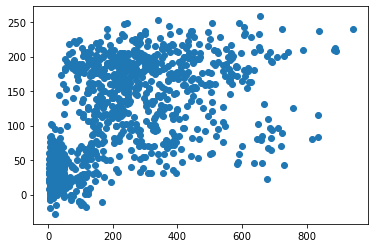

In [52]:
plt.plot(test_y, predicted_y, 'o')

# С категориальными признаками

In [156]:
df = pd.read_csv('bike_sharing_demand.csv', parse_dates=[0])
df.head()

df['hour'] = df.datetime.dt.hour
df['month'] = df.datetime.dt.month

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1


In [158]:
train_data = df.iloc[:-1000]
test_data = df.iloc[-1000:]

In [159]:
len(train_data) + len(test_data) == len(df)

True

In [160]:
train_y = train_data['count']
train_X = train_data.drop(['count', 'datetime', 'casual', 'registered'], axis=1)

test_y = test_data['count']
test_X = test_data.drop(['count', 'datetime', 'casual', 'registered'], axis=1)

In [161]:
binary_columns = ['holiday', 'workingday']
binary_indicies = np.array([(column in binary_columns) for column in train_X.columns])
binary_indicies

array([False,  True,  True, False, False, False, False, False, False,
       False])

In [162]:
categorical_columns = ['season', 'weather', 'month']
categorical_indicies = np.array([(column in categorical_columns) for column in train_X.columns])
categorical_indicies

array([ True, False, False,  True, False, False, False, False, False,
        True])

In [163]:
numerical_columns = ['temp', 'atemp', 'windspeed', 'humidity', 'hour']
numerical_indicies = np.array([(column in numerical_columns) for column in train_X.columns])
numerical_indicies

array([False, False, False, False,  True,  True,  True,  True,  True,
       False])

In [164]:
regressor = linear_model.SGDRegressor(random_state=42, penalty='l2', alpha=0.0223, 
                                      loss='squared_loss', max_iter=10000)

In [165]:
from sklearn import pipeline

In [166]:
estimator = Pipeline(steps=[
    ('feature_processing', pipeline.FeatureUnion(transformer_list=[
        ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data.iloc[:, binary_indicies])), 
        ('numerical_variables_processing', Pipeline(steps=[('selecring', preprocessing.FunctionTransformer(lambda data: data.iloc[:, numerical_indicies])), 
                                                          ('scaling', StandardScaler())])), 
        ('categorical_variables_preprocessing', Pipeline(steps=[('selecting', preprocessing.FunctionTransformer(lambda data: data.iloc[:, categorical_indicies])), 
                                                               ('onehotencoding', preprocessing.OneHotEncoder(handle_unknown='ignore'))]))
    ])), 
    ('model_fitting', regressor)
])

In [167]:
estimator.fit(train_X, train_y)

Pipeline(steps=[('feature_processing',
                 FeatureUnion(transformer_list=[('binary_variables_processing',
                                                 FunctionTransformer(func=<function <lambda> at 0x0000017F76780700>)),
                                                ('numerical_variables_processing',
                                                 Pipeline(steps=[('selecring',
                                                                  FunctionTransformer(func=<function <lambda> at 0x0000017F767835E0>)),
                                                                 ('scaling',
                                                                  StandardScaler())])),
                                                ('categorical_variables_preprocessing',
                                                 Pipeline(steps=[('selecting',
                                                                  FunctionTransformer(func=<function <lambda> at 0x0000017F76783550>

In [168]:
metrics.mean_absolute_error(test_y, estimator.predict(test_X))

124.12463189863749

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [171]:
regressor = RandomForestRegressor(random_state=0, 
                                 max_depth=20, n_estimators=50)

In [172]:
estimator = Pipeline(steps=[
    ('feature_processing', pipeline.FeatureUnion(transformer_list=[
        ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data.iloc[:, binary_indicies])), 
        ('numerical_variables_processing', Pipeline(steps=[('selecring', preprocessing.FunctionTransformer(lambda data: data.iloc[:, numerical_indicies])), 
                                                          ('scaling', StandardScaler())])), 
        ('categorical_variables_preprocessing', Pipeline(steps=[('selecting', preprocessing.FunctionTransformer(lambda data: data.iloc[:, categorical_indicies])), 
                                                               ('onehotencoding', preprocessing.OneHotEncoder(handle_unknown='ignore'))]))
    ])), 
    ('model_fitting', regressor)
])

In [173]:
estimator.fit(train_X, train_y)

Pipeline(steps=[('feature_processing',
                 FeatureUnion(transformer_list=[('binary_variables_processing',
                                                 FunctionTransformer(func=<function <lambda> at 0x0000017F766F80D0>)),
                                                ('numerical_variables_processing',
                                                 Pipeline(steps=[('selecring',
                                                                  FunctionTransformer(func=<function <lambda> at 0x0000017F766F81F0>)),
                                                                 ('scaling',
                                                                  StandardScaler())])),
                                                ('categorical_variables_preprocessing',
                                                 Pipeline(steps=[('selecting',
                                                                  FunctionTransformer(func=<function <lambda> at 0x0000017F766F8280>

In [175]:
metrics.mean_absolute_error(test_y, estimator.predict(test_X))

79.45312516745592

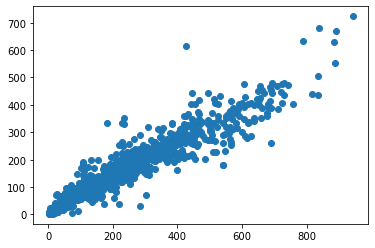

In [176]:
plt.plot(test_y, estimator.predict(test_X), 'o')